In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
calories_df = pd.read_csv('/content/drive/MyDrive/Fitlife/calories.csv')
exercise_df = pd.read_csv('/content/drive/MyDrive/Fitlife/exercise.csv')

In [ ]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [ ]:
calories_df.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [ ]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [ ]:
calories_df.shape

(15000, 2)

In [ ]:
merge_df=pd.merge(calories_df,exercise_df,on='User_ID')

In [ ]:
merge_df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


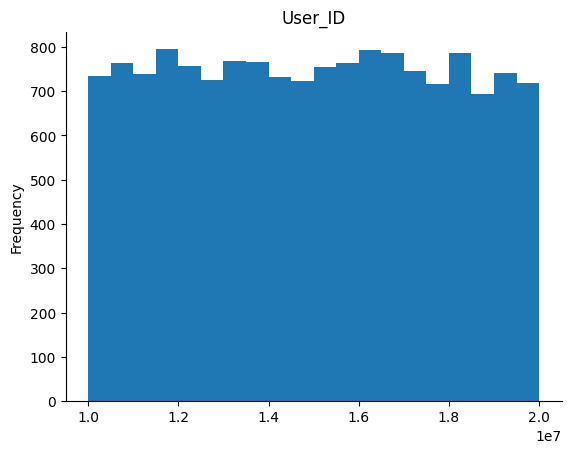

In [ ]:
# @title User_ID

from matplotlib import pyplot as plt
merge_df['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

# @title User_ID

# Remove the 'User_ID' column from the DataFrame
merge_df = merge_df.drop('User_ID', axis=1)

# Now, 'User_ID' is no longer part of the DataFrame


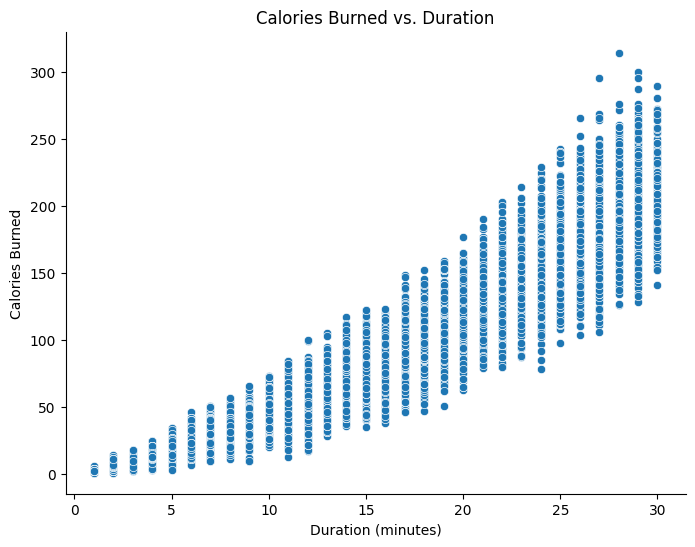

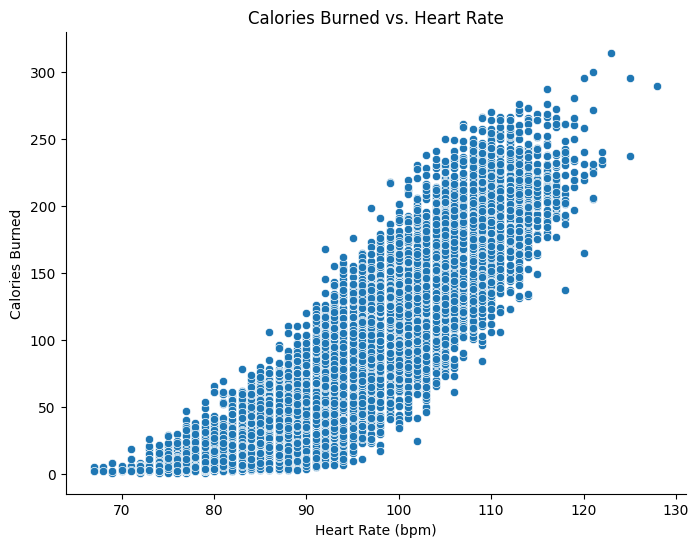

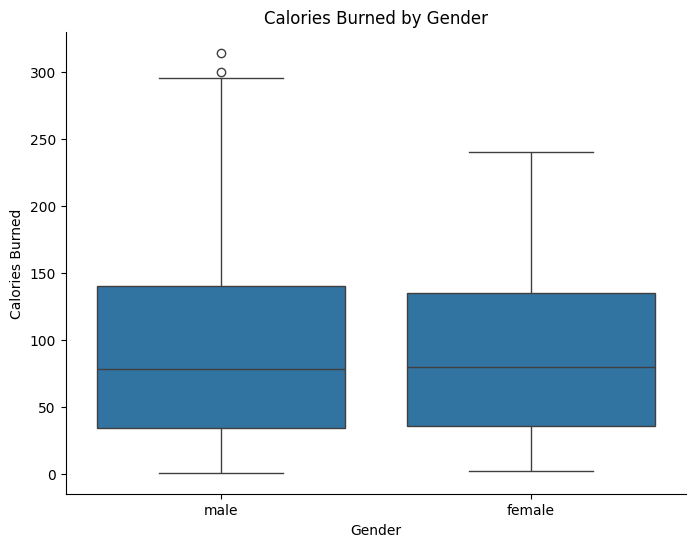

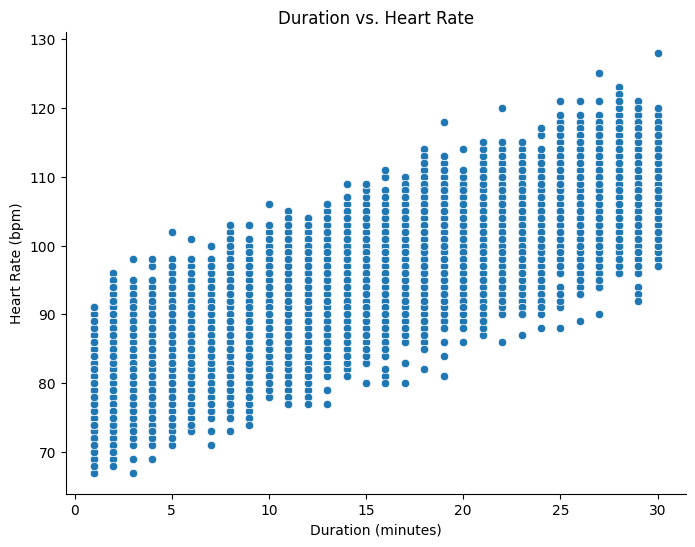

In [ ]:
# @title Calories Burned vs. Duration

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Calories', data=merge_df)
plt.title('Calories Burned vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# @title Calories Burned vs. Heart Rate

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', data=merge_df)
plt.title('Calories Burned vs. Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories Burned')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# @title Calories Burned by Gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=merge_df)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# @title Duration vs. Heart Rate

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Heart_Rate', data=merge_df)
plt.title('Duration vs. Heart Rate')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [ ]:

# and they are in centimeters and kilograms, respectively.

# Calculate BMI and add it as a new column
merge_df['BMI'] = merge_df['Weight'] / ((merge_df['Height'] / 100) ** 2)

# Display the DataFrame with the BMI column
print(merge_df.head())


   Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0     231.0    male   68   190.0    94.0      29.0       105.0       40.8   
1      66.0  female   20   166.0    60.0      14.0        94.0       40.3   
2      26.0    male   69   179.0    79.0       5.0        88.0       38.7   
3      71.0  female   34   179.0    71.0      13.0       100.0       40.5   
4      35.0  female   27   154.0    58.0      10.0        81.0       39.8   

         BMI  
0  26.038781  
1  21.773842  
2  24.655910  
3  22.159109  
4  24.456063  


In [ ]:

# Define function to categorize BMI
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi < 24.9:
    return 'Normal weight'
  elif 25 <= bmi < 29.9:
    return 'Overweight'
  else:
    return 'Obesity'

# Apply the function to create a new column 'BMI_Category'
merge_df['BMI_Category'] = merge_df['BMI'].apply(categorize_bmi)

# Convert the 'BMI_Category' column to object type
merge_df['BMI_Category'] = merge_df['BMI_Category'].astype('object')

# Print the DataFrame to see the new column
print(merge_df.head())


   Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0     231.0    male   68   190.0    94.0      29.0       105.0       40.8   
1      66.0  female   20   166.0    60.0      14.0        94.0       40.3   
2      26.0    male   69   179.0    79.0       5.0        88.0       38.7   
3      71.0  female   34   179.0    71.0      13.0       100.0       40.5   
4      35.0  female   27   154.0    58.0      10.0        81.0       39.8   

         BMI   BMI_Category  
0  26.038781     Overweight  
1  21.773842  Normal weight  
2  24.655910  Normal weight  
3  22.159109  Normal weight  
4  24.456063  Normal weight  


In [ ]:


# Convert the 'Gender' column to object type
merge_df['Gender'] = merge_df['Gender'].astype('object')

# Print the DataFrame to see the updated column type
print(merge_df.head())


   Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0     231.0    male   68   190.0    94.0      29.0       105.0       40.8   
1      66.0  female   20   166.0    60.0      14.0        94.0       40.3   
2      26.0    male   69   179.0    79.0       5.0        88.0       38.7   
3      71.0  female   34   179.0    71.0      13.0       100.0       40.5   
4      35.0  female   27   154.0    58.0      10.0        81.0       39.8   

         BMI   BMI_Category  
0  26.038781     Overweight  
1  21.773842  Normal weight  
2  24.655910  Normal weight  
3  22.159109  Normal weight  
4  24.456063  Normal weight  


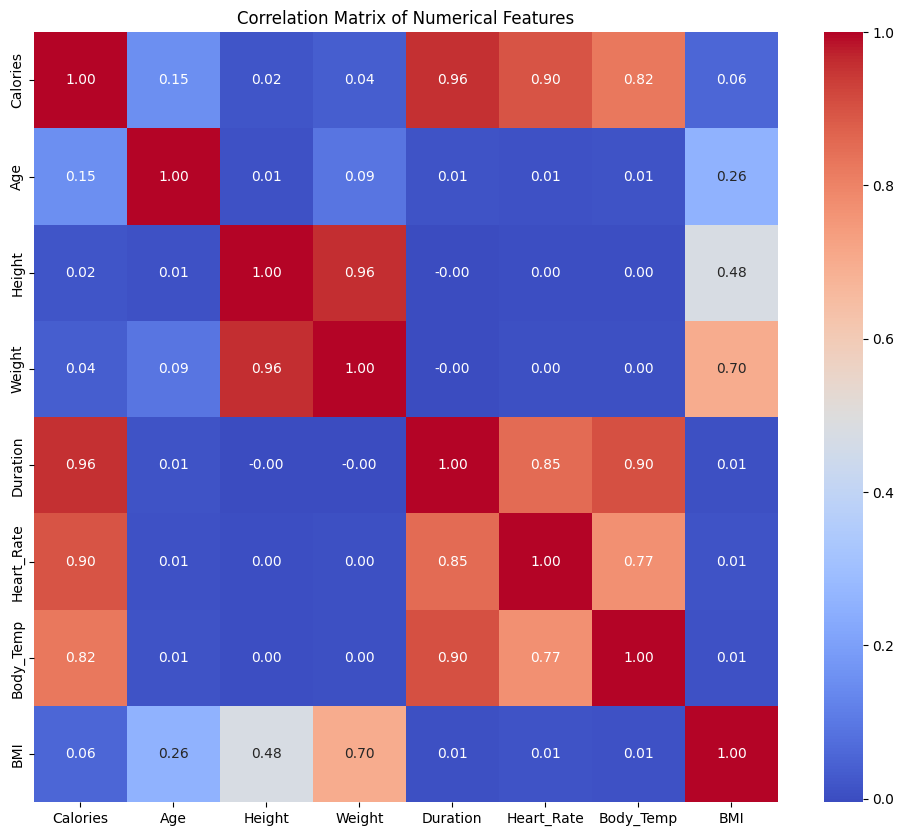

In [ ]:

# Select only numerical columns for correlation analysis
numerical_cols = merge_df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix for numerical columns
correlation_matrix = merge_df[numerical_cols].corr()

# Plot the correlation matrix using a heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
.

# Drop 'Height' and 'Weight' columns
merge_df = merge_df.drop(['Height', 'Weight'], axis=1)

# Display the DataFrame after dropping columns
print(merge_df.head())


   Calories  Gender  Age  Duration  Heart_Rate  Body_Temp        BMI  \
0     231.0    male   68      29.0       105.0       40.8  26.038781   
1      66.0  female   20      14.0        94.0       40.3  21.773842   
2      26.0    male   69       5.0        88.0       38.7  24.655910   
3      71.0  female   34      13.0       100.0       40.5  22.159109   
4      35.0  female   27      10.0        81.0       39.8  24.456063   

    BMI_Category  
0     Overweight  
1  Normal weight  
2  Normal weight  
3  Normal weight  
4  Normal weight  


In [ ]:
# prompt: create a age group column

# Define function to categorize age into groups
def categorize_age(age):
  if age < 20:
    return 'Teenager'
  elif 20 <= age < 30:
    return 'Young Adult'
  elif 30 <= age < 40:
    return 'Adult'
  elif 40 <= age < 50:
    return 'Middle-Aged'
  elif 50 <= age < 60:
    return 'Older Adult'
  else:
    return 'Senior'

# Create a new column 'Age_Group' using the categorize_age function
merge_df['Age_Group'] = merge_df['Age'].apply(categorize_age)

# Print the DataFrame to see the new column
print(merge_df.head())


   Calories  Gender  Age  Duration  Heart_Rate  Body_Temp        BMI  \
0     231.0    male   68      29.0       105.0       40.8  26.038781   
1      66.0  female   20      14.0        94.0       40.3  21.773842   
2      26.0    male   69       5.0        88.0       38.7  24.655910   
3      71.0  female   34      13.0       100.0       40.5  22.159109   
4      35.0  female   27      10.0        81.0       39.8  24.456063   

    BMI_Category    Age_Group  
0     Overweight       Senior  
1  Normal weight  Young Adult  
2  Normal weight       Senior  
3  Normal weight        Adult  
4  Normal weight  Young Adult  


In [ ]:

# Convert 'Gender' to numerical values (e.g., male=0, female=1)
merge_df['Gender'] = merge_df['Gender'].map({'male': 0, 'female': 1})

# Print the DataFrame to see the updated 'Gender' column
print(merge_df.head())


   Calories  Gender  Age  Duration  Heart_Rate  Body_Temp        BMI  \
0     231.0       0   68      29.0       105.0       40.8  26.038781   
1      66.0       1   20      14.0        94.0       40.3  21.773842   
2      26.0       0   69       5.0        88.0       38.7  24.655910   
3      71.0       1   34      13.0       100.0       40.5  22.159109   
4      35.0       1   27      10.0        81.0       39.8  24.456063   

    BMI_Category    Age_Group  
0     Overweight       Senior  
1  Normal weight  Young Adult  
2  Normal weight       Senior  
3  Normal weight        Adult  
4  Normal weight  Young Adult  


In [ ]:

x = merge_df[['Gender', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']]
y = merge_df['Calories']
print(x.shape)
y.shape


(15000, 6)


(15000,)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# X_train, X_test: Training and testing feature data
# y_train, y_test: Training and testing target data
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Ensures reproducibility of the split (you can change this value)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10500, 6)
X_test shape: (4500, 6)
y_train shape: (10500,)
y_test shape: (4500,)


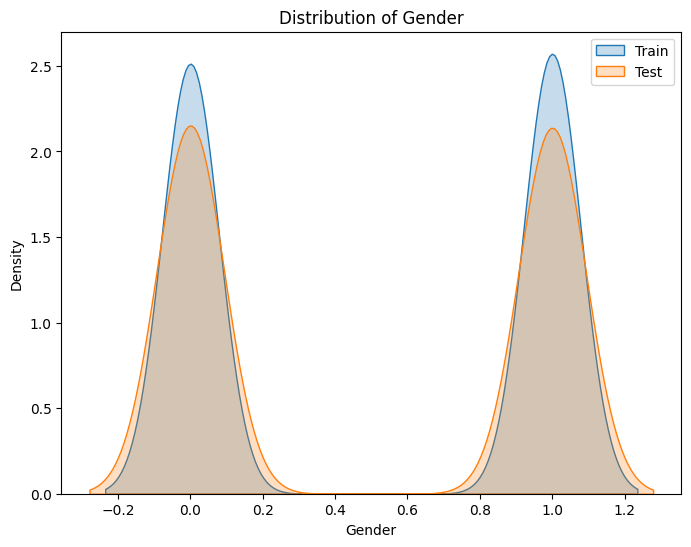

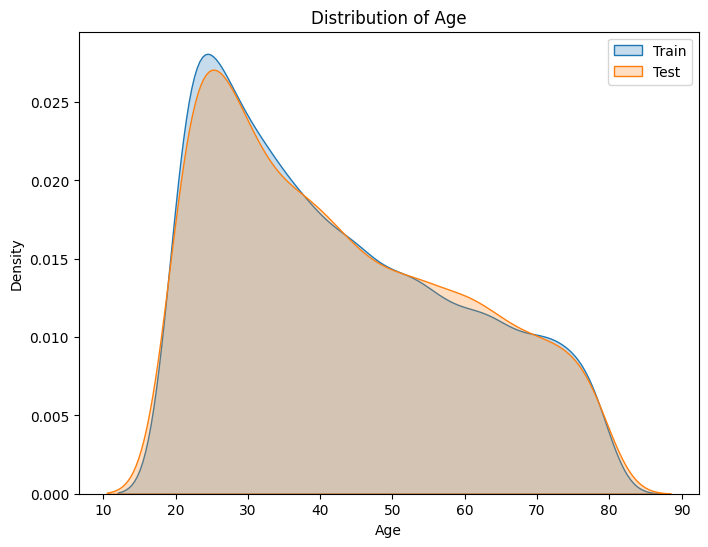

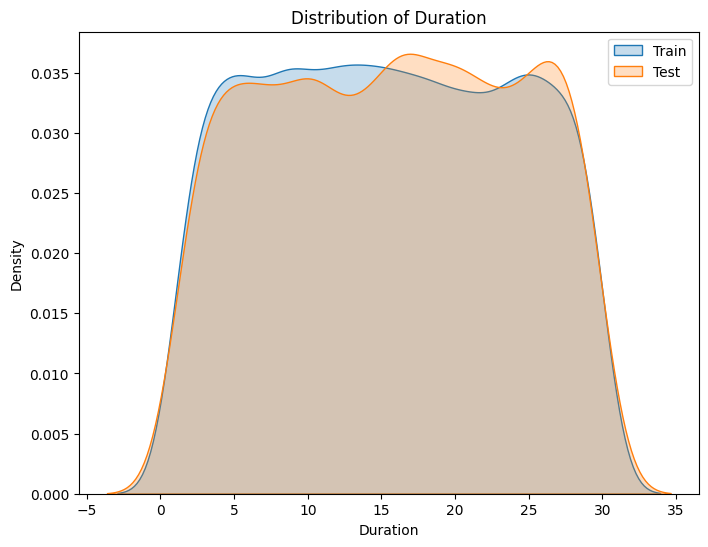

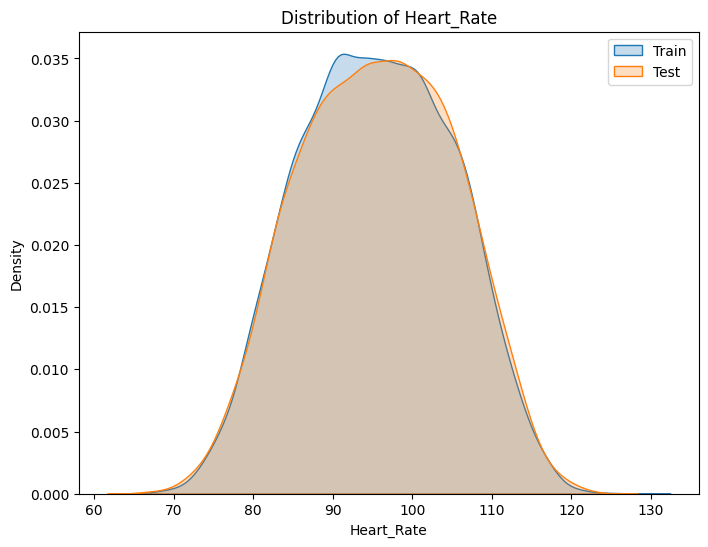

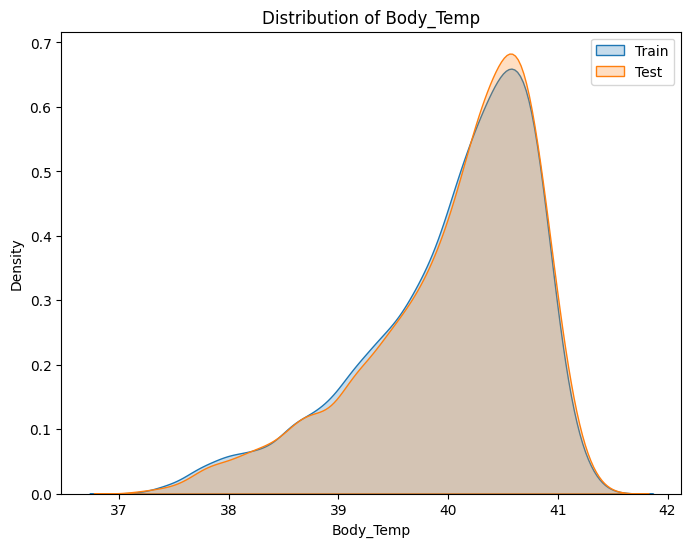

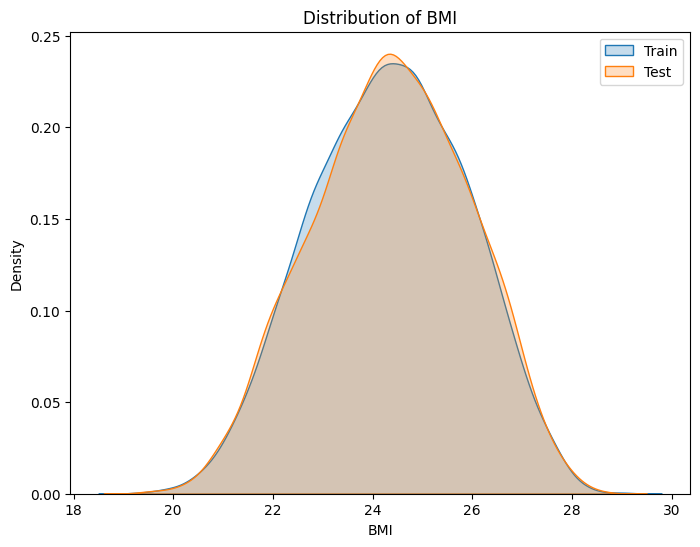

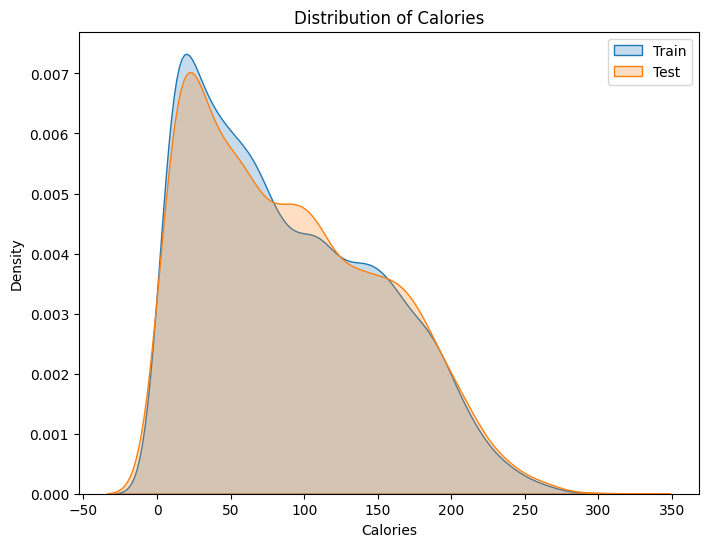

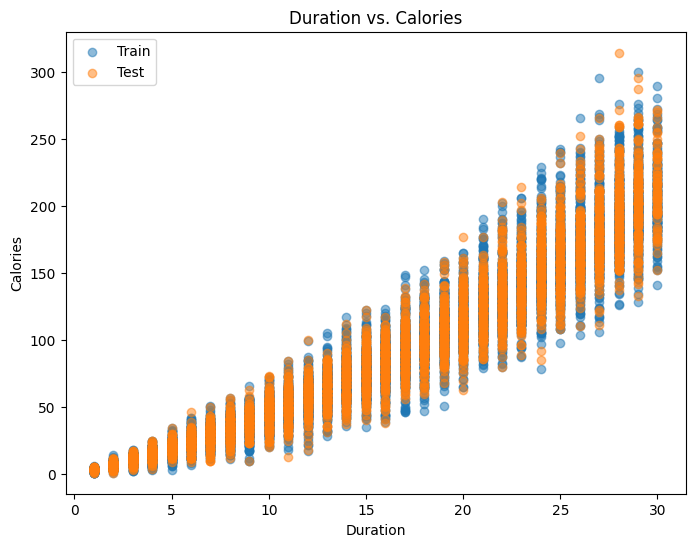

In [ ]:


# Plot distributions of features in training and testing sets
for feature in X_train.columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(X_train[feature], label='Train', shade=True)
  sns.kdeplot(X_test[feature], label='Test', shade=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.legend()
  plt.show()

# Plot distribution of target variable in training and testing sets
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Train', shade=True)
sns.kdeplot(y_test, label='Test', shade=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_train['Duration'], y_train, label='Train', alpha=0.5)
plt.scatter(X_test['Duration'], y_test, label='Test', alpha=0.5)
plt.title('Duration vs. Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.legend()
plt.show()



Mean Squared Error: 134.48396159278843
R-squared: 0.9659310893455453


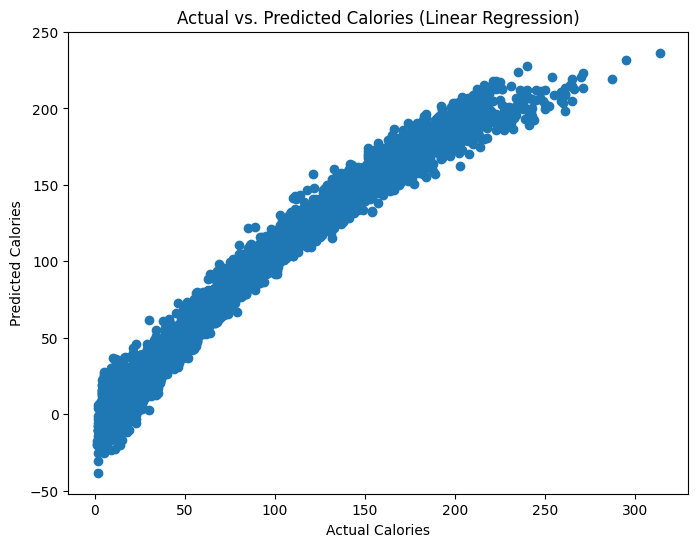

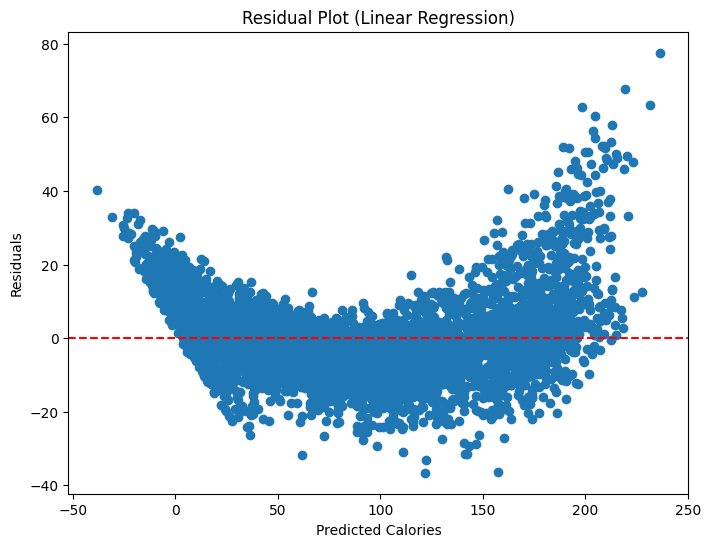

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Linear Regression)")
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 5, 'max_features': 3, 'n_estimators': 1000}
Best score: -90.13447827090557
Mean Squared Error: 93.88200145680004
R-squared: 0.9762168106753287


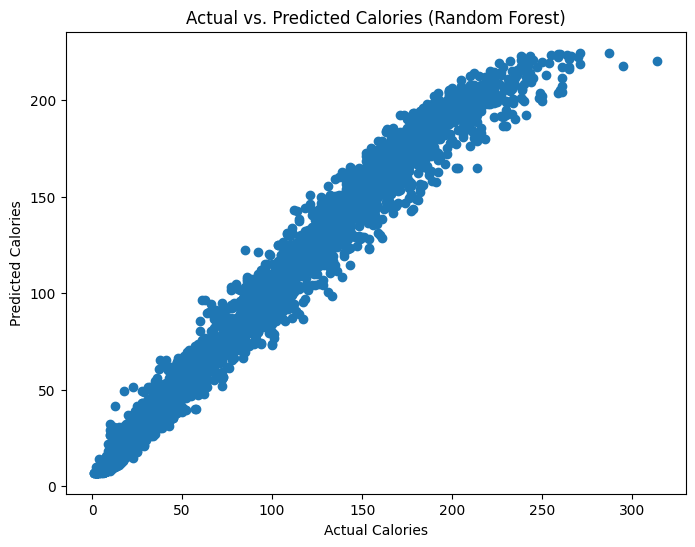

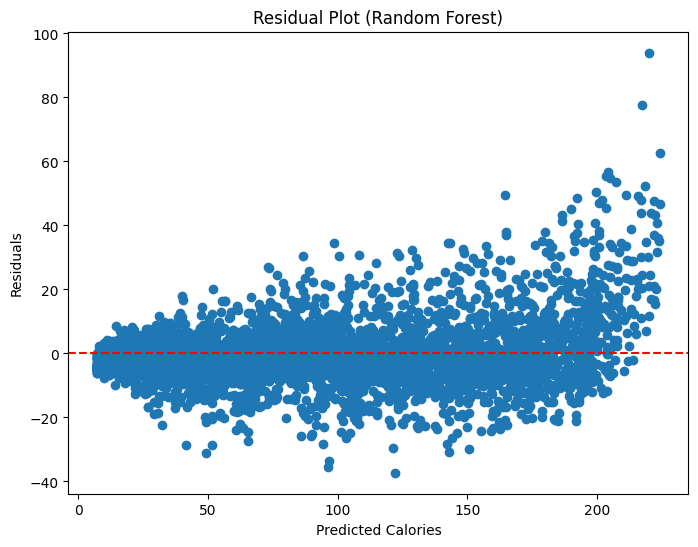

In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Create a Random Forest Regressor
forest_reg = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_features': [2, 2, 3],
    'max_depth': [2, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Random Forest)")
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


Mean Squared Error: 94.32297301150163
R-squared: 0.9761050990606472


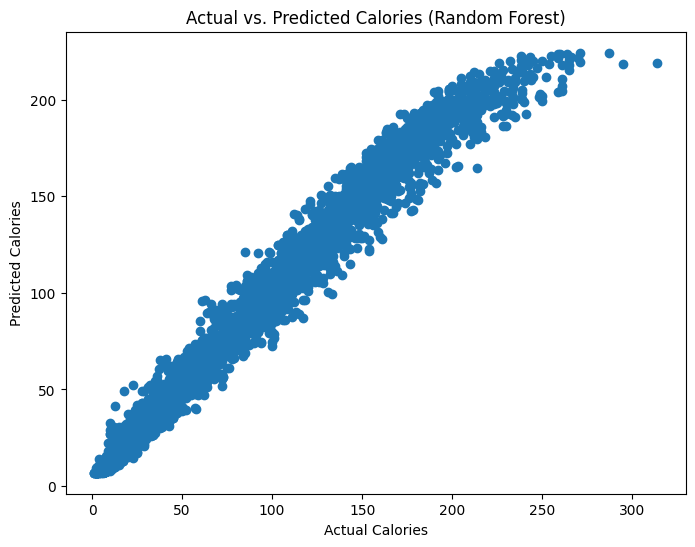

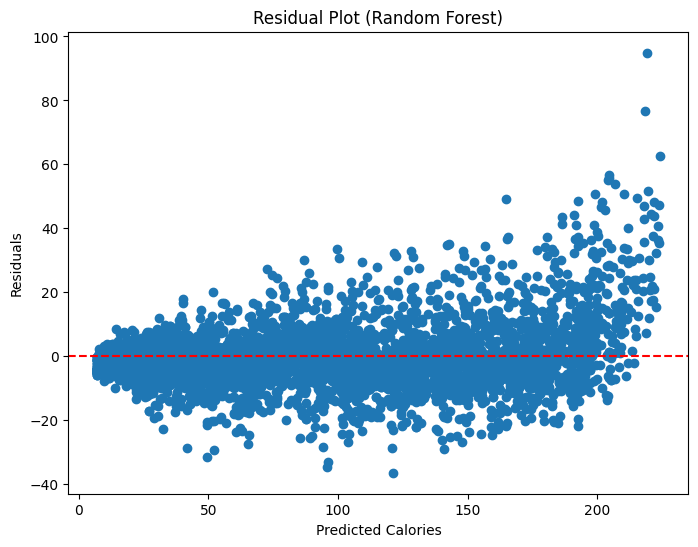

In [ ]:

# Create a Random Forest Regressor with specified parameters
rf_model = RandomForestRegressor(max_depth=5, max_features=3, n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Random Forest)")
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [ ]:


rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 9.712001493590373


In [ ]:


import pickle
from google.colab import files

# Replace 'rf_model' with the actual variable name if it's different

# Save the model to a pickle file
filename = 'calories_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

# Download the pickle file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(model, "calories_model.pkl")


['calories_model.pkl']

In [ ]:

# Save the model to a pickle file
filename = 'calories_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

# Download the pickle file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import numpy as np

joblib.dump(model, "calories_model.pkl")
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>